## Lab 7: Data access

In [157]:
# commented out after running once

# Install package for obtaining USGS streamflow data
#!pip install -U dataretrieval

---------------
## Question 1 (10 points)

Make a new `jupyter notebook` called `lab7_submission.ipynb` and complete the following tasks:


* Download daily values (i.e. `service='dv'`) for another station and time period of your choosing.



* Plot one column



* In a **markdown** cell below, describe what your plot shows



A map of station ID numbers can be found here: https://maps.waterdata.usgs.gov/mapper/index.html

A table of the parameter codes can be found here: https://help.waterdata.usgs.gov/parameter_cd?group_cd=PHY

---------------

In [158]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '14158050'

# Get daily values (dv)
df = nwis.get_record(sites=site, service='dv', start='2021-10-01', end='2022-01-31')
df

,00065_Mean,00065_Mean_cd,site_no
datetime,,,
2021-10-01 00:00:00+00:00,9.69,P,14158050
2021-10-02 00:00:00+00:00,9.69,P,14158050
2021-10-03 00:00:00+00:00,9.68,P,14158050
2021-10-04 00:00:00+00:00,9.68,P,14158050
2021-10-05 00:00:00+00:00,9.69,P,14158050
...,...,...,...
2022-01-27 00:00:00+00:00,11.49,P,14158050
2022-01-28 00:00:00+00:00,11.42,P,14158050
2022-01-29 00:00:00+00:00,10.96,P,14158050


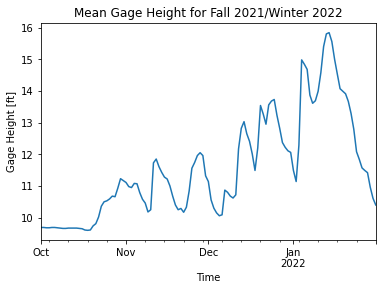

In [159]:
# Simple plot
df['00065_Mean'].plot(xlabel='Time', ylabel='Gage Height [ft]', title='Mean Gage Height for Fall 2021/Winter 2022');

In the above plot, I am plotting the mean gage height of the Willametter, measured in Eugene, OR, as the region enters the "rainy" winter season. We can see a large increase in gage height as winter progresses, and it follows a seemingly oscillating pattern that may indicate specific rain storms.

---------------
## Question 2 (10 points)

* Make an HTML table that contains the **site name**, **site number** and **mean daily discharge** between Oct 31, 2020 and Sep 30, 2021 (zero decimal places)** for **three** rivers in the US.

HINT: the discharge parameter is `00060_Mean`. If the data from your site does not contain this column, try another site.

--------------

In [181]:
# Specify the USGS site code
site = '01358000'
# Get daily values (dv)
df_hudson = nwis.get_record(sites=site, service='dv', start='2020-10-31', end='2021-09-30', parameterCd='00060')
df_hud_info = nwis.get_record(sites=site, service='site', start='2020-10-31', end='2021-09-30', parameterCd='00060')

df_hudson['site_nm'] = df_hud_info['station_nm'].to_string(index=False)
df_hudson['Mean_discharge'] = df_hudson['00060_Mean'].mean()

# Specify the USGS site code
site = '041015313'
# Get daily values (dv)
df_dowagiac = nwis.get_record(sites=site, service='dv', start='2020-10-31', end='2021-09-30', parameterCd='00060')
df_dow_info = nwis.get_record(sites=site, service='site', start='2020-10-31', end='2021-09-30', parameterCd='00060')

df_dowagiac['site_nm'] = df_dow_info['station_nm'].to_string(index=False)
df_dowagiac['Mean_discharge'] = df_dowagiac['00060_Mean'].mean()

# Specify the USGS site code
site = '14105700'
# Get daily values (dv)
df_dalles = nwis.get_record(sites=site, service='dv', start='2020-10-31', end='2021-09-30', parameterCd='00060')
df_dal_info = nwis.get_record(sites=site, service='site', start='2020-10-31', end='2021-09-30', parameterCd='00060')

df_dalles['site_nm'] = df_dal_info['station_nm'].to_string(index=False)
df_dalles['Mean_discharge'] = df_dalles['00060_Mean'].mean()

# This is a mess, but it works. So, I'm going to leave it
discharge_df = df_hudson.iloc[0].to_frame().join(df_dowagiac.iloc[1].to_frame().join(df_dalles.iloc[2])).T
html_tab = discharge_df.drop(['00060_Mean_cd','00060_Mean'], axis=1).to_html(index=False, justify='justify')
print(html_tab)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: justify;">
      <th>site_no</th>
      <th>site_nm</th>
      <th>Mean_discharge</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>01358000</td>
      <td>HUDSON RIVER AT GREEN ISLAND NY</td>
      <td>15201.313433</td>
    </tr>
    <tr>
      <td>041015313</td>
      <td>OSBORN DRAIN AT DEWEY LAKE ST NR GLENWOOD, MI</td>
      <td>8.446537</td>
    </tr>
    <tr>
      <td>14105700</td>
      <td>COLUMBIA RIVER AT THE DALLES, OR</td>
      <td>152497.885196</td>
    </tr>
  </tbody>
</table>


In [182]:
# We can use this cell to view the table in markdown, instead of copying the text output from the last cell
from IPython.display import Markdown as md
md(html_tab)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: justify;">
      <th>site_no</th>
      <th>site_nm</th>
      <th>Mean_discharge</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>01358000</td>
      <td>HUDSON RIVER AT GREEN ISLAND NY</td>
      <td>15201.313433</td>
    </tr>
    <tr>
      <td>041015313</td>
      <td>OSBORN DRAIN AT DEWEY LAKE ST NR GLENWOOD, MI</td>
      <td>8.446537</td>
    </tr>
    <tr>
      <td>14105700</td>
      <td>COLUMBIA RIVER AT THE DALLES, OR</td>
      <td>152497.885196</td>
    </tr>
  </tbody>
</table>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>site_no</th>
      <th>site_nm</th>
      <th>Mean_discharge</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>01358000</td>
      <td>HUDSON RIVER AT GREEN ISLAND NY</td>
      <td>15201.313433</td>
    </tr>
    <tr>
      <td>041015313</td>
      <td>OSBORN DRAIN AT DEWEY LAKE ST NR GLENWOOD, MI</td>
      <td>8.446537</td>
    </tr>
    <tr>
      <td>14105700</td>
      <td>COLUMBIA RIVER AT THE DALLES, OR</td>
      <td>152497.885196</td>
    </tr>
  </tbody>
</table>

---------------
## Question 3 (10 points)

* Make a new map of the tallest mountains in Oregon but include a popup that displays the `Isolation` data as a **float**.

--------------

## Extra credit/grad students 

* Add a popup that includes the name of the mountain as a `string` (without any square brackets).  

--------------

In [162]:
# Import packages
import numpy as np
import pandas as pd
import folium
import warnings
warnings.filterwarnings("ignore")

In [163]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')

# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], 
                                        "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

# format the mountain peak names to get rid of trailing square brackets
for i in range(len(mountain_stats)):
    mountain_stats['Mountain peak'][i] = mountain_stats['Mountain peak'][i].split("[", 1)[0]

In [174]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))

# To get these data from every row, we can write another quick for loop
isolation = []
for i in range(len(mountain_stats)):
    isol = float(mountain_stats['Isolation'].iloc[i][:-3])
    isolation.append(isol)

map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    popup = (mountain_stats['Mountain peak'][i].split("[", 1)[0] 
             + "\nIsolation: %.2f km" %(isolation[i]))
    folium.Marker(coords[i], popup=popup).add_to(map)
map
# the map forgoes elevation in the pop up for the Mountain Peak name and the Isolation. 
# Insang said this format was okay.

---------------
## Question 4 (10 points)

* Write a script to automatically derive the geographic coordinates for the following addresses:

    * 1844 SW Morrison St, Portland, OR 97205
    
    * 800 Occidental Ave S, Seattle, WA 98134
    
    * 1001 Stadium Dr, Inglewood, CA 90301
    
    * 2700 Martin Luther King Jr Blvd, Eugene, OR 97401
    

You can **either** find each one individually **or** make a list of the addresses and use a for loop. 


* Plot the coordinates of these addresses on an interactive map using `folium` 



--------------


In [91]:
# commented out after running once

# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
#!pip3 install webdriver_manager

In [28]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
options = webdriver.ChromeOptions()
options.add_argument("--headless") # hide browser

In [29]:
address_list = ["1844 SW Morrison St, Portland, OR 97205", "800 Occidental Ave S, Seattle, WA 98134",
    "1001 Stadium Dr, Inglewood, CA 90301",
    "2700 Martin Luther King Jr Blvd, Eugene, OR 97401"]

address_coords = []
# Loop through every ski resort to find it's coordinates
for address in address_list:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + address
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    address_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/jsheppard/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/jsheppard/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/jsheppard/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/jsheppard/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


In [30]:
address_coords

[('45.5216773', '-122.6995831'),
 ('47.5933098', '-122.341027'),
 ('33.9530046', '-118.347279'),
 ('44.0594284', '-123.0776579')]

In [33]:
map = folium.Map(location=[44, -121], zoom_start=5)
for i in range(0, len(address_coords)):
    folium.Marker(address_coords[i], popup=address_list[i]).add_to(map)
map

---------------
## Question 5 (10 points)

* Which ski resort received **more** snowfall in 2020, Mount Ashland, Willammette Pass or Hoodoo? 

--------------

In [34]:
# Import package
import xarray as xr

# Define filepath
fp = './data'

# Read data
xds = xr.open_dataset(fp + '/era_monthly_snowfall_2020.nc', decode_coords='all')

In [35]:
resorts = ["Mount Ashland", "Hoodoo", "Willamette Pass"]
resort_coords = ['42.081689', '-122.7069373', '44.4086477', '-121.8735991', '43.6000579', '-122.0387233']

cum_snow_depths = []
cum_snow_depths.append(xds['sf'].sel(latitude=resort_coords[0], longitude=resort_coords[1], method='nearest').sum().values)
cum_snow_depths.append(xds['sf'].sel(latitude=resort_coords[2], longitude=resort_coords[3], method='nearest').sum().values)
cum_snow_depths.append(xds['sf'].sel(latitude=resort_coords[4], longitude=resort_coords[5], method='nearest').sum().values)

cum_snow_depth_max = max(cum_snow_depths)
resort_index = cum_snow_depths.index(cum_snow_depth_max)

print("The resort that recieved the most snowfall in 2020 was %s at %.4f m of water equivalent" %(resorts[resort_index], cum_snow_depth_max))

The resort that recieved the most snowfall in 2020 was Willamette Pass at 0.0196 m of water equivalent


## Extra credit/grad students

Download `era_monthly_snowfall_1979_2020.nc` from the lab7 folder on Dropbox. 

* Rank the ski resorts by:

    * Average snowfall in **November**
    
    * Average snowfall in **Spring** (i.e. March, April, and May)
    
    * **Interannual variability** in snowfall 

In [79]:
# Define filepath
fp = './data'

# Read data
xds = xr.open_dataset(fp + '/era_monthly_snowfall_1979_2020.nc', decode_coords='all')

In [80]:
xds

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, time: 504)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:07:38 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [56]:
resorts_full = ['Anthony Lakes (ski area)', 'Mount Ashland Ski Area', 'Cooper Spur ski area',
     'Ferguson Ridge Ski Area', 'Hoodoo (ski area)', 'Mount Ashland Ski Area Expansion',
     'Mount Bachelor ski area', 'Mount Hood Meadows', 'Mount Hood Skibowl', 'Snow Bunny',
     'Spout Springs Ski Area', 'Summit Pass (Oregon)', 'Timberline Lodge ski area',
     'Warner Canyon', 'Willamette Pass Resort']

resort_coords_full = [('44.9629273', '-118.2357075'), ('42.081689', '-122.7069373'),
     ('45.4188609', '-121.6064311'), ('45.2816889', '-117.1148251'), ('44.4086477', '-121.8735991'),
     ('42.081689', '-122.7069373'), ('44.0028975', '-121.6812547'), ('45.331759', '-121.6673681'),
     ('45.2943906', '-121.80705'), ('45.2871456', '-121.7312248'), ('45.7552462', '-118.0536043'),
     ('43.9688848', '-125.7230331'), ('45.3233604', '-121.7891084'), ('42.237378', '-120.2968217'),
     ('43.6000579', '-122.0387233')]

In [114]:
# Average snowfall in November
xds_nov = xds.isel(time=(xds.time.dt.month == 11)).copy(deep=True)
xds_nov = np.mean(xds_nov['sf'], axis=0)

nov_resorts_snowfall = []
for ii in range(len(resorts_full)):
    nov_resorts_snowfall.append(xds_nov.sel(latitude=resort_coords_full[ii][0], longitude=resort_coords_full[ii][1], method='nearest').values)
    
nov_sorted = (list(zip(nov_resorts_snowfall, resorts_full)))
nov_sorted.sort(reverse=True)
res = "\n".join("{} {}".format(x, y) for x, y in nov_sorted)
print("The resorts below are sorted by Average Snowfall in November, with their values (m of water equivalent) preceeding them.\n" + res)

The resorts below are sorted by Average Snowfall in November, with their values (m of water equivalent) preceeding them.
0.0032581265550106764 Mount Bachelor ski area
0.0028609351720660925 Willamette Pass Resort
0.00251084310002625 Hoodoo (ski area)
0.0022443565540015697 Ferguson Ridge Ski Area
0.002203376730903983 Timberline Lodge ski area
0.002203376730903983 Snow Bunny
0.002203376730903983 Mount Hood Skibowl
0.002203376730903983 Mount Hood Meadows
0.0018615922890603542 Anthony Lakes (ski area)
0.0016262013232335448 Cooper Spur ski area
0.00161919672973454 Mount Ashland Ski Area Expansion
0.00161919672973454 Mount Ashland Ski Area
0.0015659143682569265 Spout Springs Ski Area
0.0013031555572524667 Warner Canyon
1.772617252981945e-07 Summit Pass (Oregon)


In [113]:
# Average snowfall in Spring (i.e. March, April, and May)
xds_spring = xds.isel(time=xds.time.dt.month.isin([3, 4, 5])).copy(deep=True)
xds_spring = np.mean(xds_spring['sf'], axis=0)

spring_resorts_snowfall = []
for ii in range(len(resorts_full)):
    spring_resorts_snowfall.append(xds_spring.sel(latitude=resort_coords_full[ii][0], longitude=resort_coords_full[ii][1], method='nearest').values)
    
spring_sorted = (list(zip(spring_resorts_snowfall, resorts_full)))
spring_sorted.sort(reverse=True)
res = "\n".join("{} {}".format(x, y) for x, y in spring_sorted)
print("The resorts below are sorted by Average Spring Snowfall, with their values (m of water equivalent) preceeding them.\n" + res)

The resorts below are sorted by Average Spring Snowfall, with their values (m of water equivalent) preceeding them.
0.0020057980436831713 Mount Bachelor ski area
0.0017587586771696806 Willamette Pass Resort
0.0015363441780209541 Ferguson Ridge Ski Area
0.0015250901924446225 Hoodoo (ski area)
0.0014855017652735114 Timberline Lodge ski area
0.0014855017652735114 Snow Bunny
0.0014855017652735114 Mount Hood Skibowl
0.0014855017652735114 Mount Hood Meadows
0.0011098590912297368 Anthony Lakes (ski area)
0.0010225767036899924 Mount Ashland Ski Area Expansion
0.0010225767036899924 Mount Ashland Ski Area
0.0008413863251917064 Warner Canyon
0.0008135892567224801 Cooper Spur ski area
0.0007019572658464313 Spout Springs Ski Area
1.772691149426464e-07 Summit Pass (Oregon)


In [112]:
# Interannual variability in snowfall
# whole dataset, over all years (sum the years first) which resort had greatest range of snowfall
xds_resamp = xds.resample(time="A").mean() #downsampling to yearly

resorts_snowfall_var = []
for ii in range(len(resorts_full)):
    resorts_snowfall_var.append(np.max(xds_resamp['sf'].sel(latitude=resort_coords_full[ii][0],longitude=resort_coords_full[ii][1], method='nearest').values)
                                - np.min(xds_resamp['sf'].sel(latitude=resort_coords_full[ii][0],longitude=resort_coords_full[ii][1], method='nearest').values))

variability_sorted = (list(zip(resorts_snowfall_var, resorts_full)))
variability_sorted.sort(reverse=True)
res = "\n".join("{} {}".format(x, y) for x, y in variability_sorted)
print("The resorts below are sorted by Annual Snowfall Variability, with their values (m of water equivalent) preceeding them.\n" + res)

The resorts below are sorted by Annual Snowfall Variability, with their values (m of water equivalent) preceeding them.
0.0018056788248941302 Mount Bachelor ski area
0.0016239648684859276 Willamette Pass Resort
0.0014748508110642433 Hoodoo (ski area)
0.0014544122386723757 Timberline Lodge ski area
0.0014544122386723757 Snow Bunny
0.0014544122386723757 Mount Hood Skibowl
0.0014544122386723757 Mount Hood Meadows
0.0012983892811462283 Mount Ashland Ski Area Expansion
0.0012983892811462283 Mount Ashland Ski Area
0.0010571347083896399 Ferguson Ridge Ski Area
0.001047131372615695 Cooper Spur ski area
0.0009115954162552953 Warner Canyon
0.0007847189554013312 Anthony Lakes (ski area)
0.0007617618539370596 Spout Springs Ski Area
3.130532059003599e-05 Summit Pass (Oregon)
